<a href="https://colab.research.google.com/github/abinbena/D-Advisor-Bangkit-Capstone-Project/blob/main/Capstone_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow tensorflow_decision_forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 67.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 74.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 32.1 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successf

In [ ]:
pip install wurlitzer

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("Training.csv")
df.head(10)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
5,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
6,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
7,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
8,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
9,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [ ]:
print("Total disease: ", df["prognosis"].nunique())

Total disease:  41


In [ ]:
df["prognosis"].value_counts()

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

In [ ]:
print("Total sample before droped:", len(df))
df = df.drop_duplicates()
print("Total sample after droped:", len(df))

Total sample before droped: 4920
Total sample after droped: 304


In [ ]:
df["prognosis"].value_counts()

prognosis
Hepatitis D                                10
Dengue                                     10
Chicken pox                                10
Migraine                                   10
Hepatitis B                                 9
Hypoglycemia                                9
Common Cold                                 9
Tuberculosis                                9
Hepatitis E                                 9
hepatitis A                                 9
Typhoid                                     9
Hyperthyroidism                             9
Jaundice                                    9
Diabetes                                    9
Pneumonia                                   9
Varicose veins                              8
Malaria                                     8
Hypothyroidism                              8
Alcoholic hepatitis                         8
Chronic cholestasis                         8
Osteoarthristis                             7
Bronchial Asthma        

In [ ]:
train_df = pd.read_csv("Training.csv")
train_df = df.drop_duplicates()
test_df = pd.read_csv("Testing.csv")
test_df = df.drop_duplicates()

In [ ]:
# Convert to TensorFlow Datasets
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label="prognosis")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label="prognosis")

In [ ]:
# Fit model
model =  tfdf.keras.RandomForestModel(verbose = 2)
model.fit(train_ds)

Use 2 thread(s) for training
Use /tmp/tmp3dunawh4 as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'itching': <tf.Tensor 'data:0' shape=(None,) dtype=int64>, 'skin_rash': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'nodal_skin_eruptions': <tf.Tensor 'data_2:0' shape=(None,) dtype=int64>, 'continuous_sneezing': <tf.Tensor 'data_3:0' shape=(None,) dtype=int64>, 'shivering': <tf.Tensor 'data_4:0' shape=(None,) dtype=int64>, 'chills': <tf.Tensor 'data_5:0' shape=(None,) dtype=int64>, 'joint_pain': <tf.Tensor 'data_6:0' shape=(None,) dtype=int64>, 'stomach_pain': <tf.Tensor 'data_7:0' shape=(None,) dtype=int64>, 'acidity': <tf.Tensor 'data_8:0' shape=(None,) dtype=int64>, 'ulcers_on_tongue': <tf.Tensor 'data_9:0' shape=(None,) dtype=int64>, 'muscle_wasting': <tf.Tensor 'data_10:0' shape=(None,) dtype=int64>, 'vomiting': <tf.Tensor 'data_11:0' shape=(None,) dtype=int64>, 'burning_micturition': <tf.Tensor 'data_12:0' shape=(None,) dtype=in

[INFO 24-06-07 12:00:36.0556 UTC kernel.cc:771] Start Yggdrasil model training
[INFO 24-06-07 12:00:36.0556 UTC kernel.cc:772] Collect training examples
[INFO 24-06-07 12:00:36.0557 UTC kernel.cc:785] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 24-06-07 12:00:36.0564 UTC kernel.cc:391] Number of batches: 1
[INFO 24-06-07 12:00:36.0565 UTC kernel.cc:392] Number of examples: 304
[INFO 24-06-07 12:00:36.0573 UTC kernel.cc:792] Training dataset:
Number of records: 304
Number of columns: 134

Number of columns by type:
	NUMERICAL: 133 (99.2537%)
	CATEGORICAL: 1 (0.746269%)

Columns:

NUMERICAL: 133 (99.2537%)
	0: "Unnamed:_133" NUMERICAL num-nas:304 (100%) mean:n

Model trained in 0:00:01.425459
Compiling model...


Model compiled.


In [ ]:
# Summary of the model structure.
model.summary()

Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (132):
	abdominal_pain
	abnormal_menstruation
	acidity
	acute_liver_failure
	altered_sensorium
	anxiety
	back_pain
	belly_pain
	blackheads
	bladder_discomfort
	blister
	blood_in_sputum
	bloody_stool
	blurred_and_distorted_vision
	breathlessness
	brittle_nails
	bruising
	burning_micturition
	chest_pain
	chills
	cold_hands_and_feets
	coma
	congestion
	constipation
	continuous_feel_of_urine
	continuous_sneezing
	cough
	cramps
	dark_urine
	dehydration
	depression
	diarrhoea
	dischromic__patches
	distention_of_abdomen
	dizziness
	drying_and_tingling_lips
	enlarged_thyroid
	excessive_hunger
	extra_ma

In [ ]:
# Evaluate model accuracy
model.compile(metrics=["accuracy"])
evaluation = model.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 473ms/step - loss: 0.0000e+00 - accuracy: 0.9770

loss: 0.0000
accuracy: 0.9770


In [ ]:
# feature importances
model.make_inspector().variable_importances()

{'NUM_NODES': [("fatigue" (1; #43), 522.0),
  ("vomiting" (1; #124), 440.0),
  ("high_fever" (1; #48), 423.0),
  ("headache" (1; #47), 375.0),
  ("nausea" (1; #74), 325.0),
  ("skin_rash" (1; #103), 318.0),
  ("abdominal_pain" (1; #2), 303.0),
  ("loss_of_appetite" (1; #63), 301.0),
  ("chest_pain" (1; #20), 294.0),
  ("itching" (1; #58), 277.0),
  ("muscle_pain" (1; #71), 265.0),
  ("joint_pain" (1; #59), 259.0),
  ("yellowing_of_eyes" (1; #132), 256.0),
  ("yellowish_skin" (1; #133), 229.0),
  ("malaise" (1; #66), 220.0),
  ("chills" (1; #21), 209.0),
  ("irritability" (1; #56), 205.0),
  ("dark_urine" (1; #30), 189.0),
  ("sweating" (1; #112), 165.0),
  ("mild_fever" (1; #67), 155.0),
  ("diarrhoea" (1; #33), 146.0),
  ("excessive_hunger" (1; #39), 144.0),
  ("dizziness" (1; #36), 135.0),
  ("loss_of_balance" (1; #64), 131.0),
  ("neck_pain" (1; #75), 126.0),
  ("burning_micturition" (1; #19), 123.0),
  ("weight_loss" (1; #129), 121.0),
  ("breathlessness" (1; #16), 113.0),
  ("coug

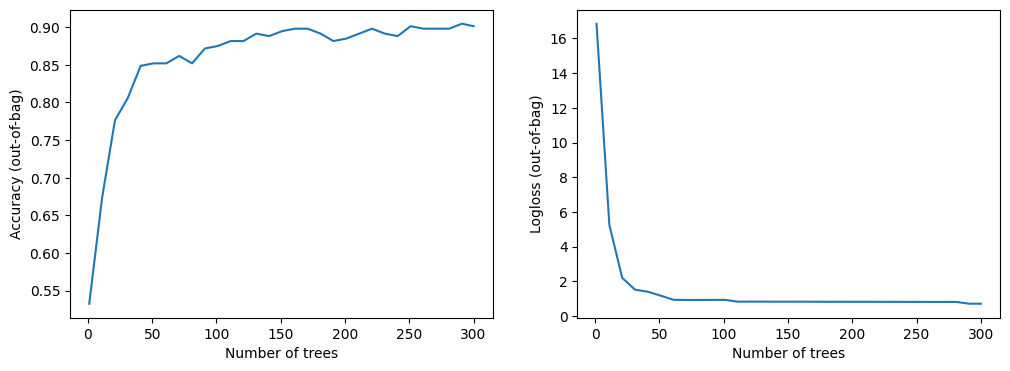

In [ ]:
# Plot training logs
logs = model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()